<a href="https://colab.research.google.com/github/clzndyal1/git_test/blob/master/20_Deep_Learning_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers, Input, models, layers, metrics
from tensorflow.keras.applications import VGG16

import numpy as np
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/taehojo/data-ch20.git

Cloning into 'data-ch20'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (265/265), done.
remote: Total 265 (delta 0), reused 265 (delta 0), pack-reused 0
Receiving objects: 100% (265/265), 1.86 MiB | 5.10 MiB/s, done.


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,   #  정규화
                  horizontal_flip=True,              # 수평으로 뒤집기
                  width_shift_range=0.1,             # 수평이동
                  height_shift_range=0.1,            # 수직이동
                  fill_mode='nearest')               # 빈 공간 채우는 방법

train_genarator = train_datagen.flow_from_directory(
                './data-ch20/train',           # 학습셋이 있는 폴더의 위치
                target_size=(150,150),
                batch_size=5,
                class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)  # 테스트셋은 정규화만
test_generator = test_datagen.flow_from_directory(
                './data-ch20/test',           # 학습셋이 있는 폴더의 위치
                target_size=(150,150),
                batch_size=5,
                class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0,5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [5]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.002), metrics=['accuracy'])

In [6]:
earlyStopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    train_genarator,
    epochs=100,
    validation_data=test_generator,
    validation_steps=10,
    callbacks=[earlyStopping_callback])

Epoch 1/100
32/32 [==============================] - 14s 40ms/step - loss: 0.7269 - accuracy: 0.4938 - val_loss: 0.6905 - val_accuracy: 0.5400
Epoch 2/100
32/32 [==============================] - 1s 35ms/step - loss: 0.6962 - accuracy: 0.4750 - val_loss: 0.7037 - val_accuracy: 0.4200
Epoch 3/100
32/32 [==============================] - 1s 35ms/step - loss: 0.6950 - accuracy: 0.4500 - val_loss: 0.6926 - val_accuracy: 0.5800
Epoch 4/100
32/32 [==============================] - 1s 36ms/step - loss: 0.6943 - accuracy: 0.4563 - val_loss: 0.6930 - val_accuracy: 0.5200
Epoch 5/100
32/32 [==============================] - 1s 46ms/step - loss: 0.6934 - accuracy: 0.4625 - val_loss: 0.6933 - val_accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 1s 36ms/step - loss: 0.6929 - accuracy: 0.5625 - val_loss: 0.6914 - val_accuracy: 0.5000


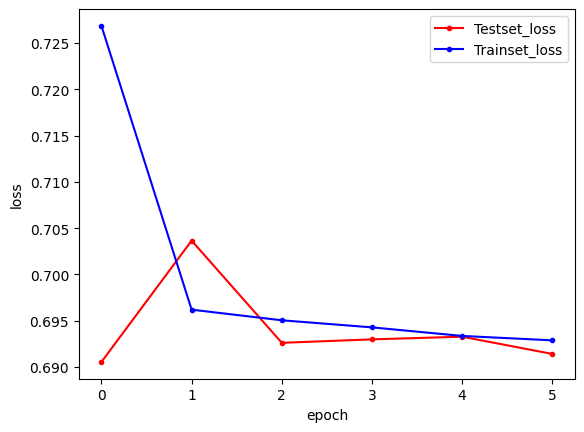

In [7]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='r', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='b', label='Trainset_loss')

plt.legend()
plt.grid
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [8]:
trans_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
trans_model.trainable = False
trans_model.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [9]:
#학습 할 모델 생성
model = Sequential()
model.add(trans_model)
model.add(Flatten())
model.add(Dense(64, Activation('relu')))
model.add(Dropout(0.5))
model.add(Dense(1, Activation('sigmoid')))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                524352    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15,239,105
Trainable params: 524,417
Non-trainable params: 14,714,688
_________________________________________________________________


Epoch 1/100
32/32 [==============================] - 4s 49ms/step - loss: 0.8337 - accuracy: 0.5688 - val_loss: 0.5095 - val_accuracy: 0.8600
Epoch 2/100
32/32 [==============================] - 1s 43ms/step - loss: 0.5363 - accuracy: 0.7375 - val_loss: 0.4144 - val_accuracy: 0.7800
Epoch 3/100
32/32 [==============================] - 2s 62ms/step - loss: 0.4934 - accuracy: 0.8125 - val_loss: 0.3797 - val_accuracy: 0.9200
Epoch 4/100
32/32 [==============================] - 1s 42ms/step - loss: 0.4514 - accuracy: 0.7750 - val_loss: 0.4074 - val_accuracy: 0.8400
Epoch 5/100
32/32 [==============================] - 1s 41ms/step - loss: 0.4835 - accuracy: 0.7625 - val_loss: 0.3495 - val_accuracy: 0.9000
Epoch 6/100
32/32 [==============================] - 1s 41ms/step - loss: 0.3505 - accuracy: 0.8438 - val_loss: 0.3922 - val_accuracy: 0.8000
Epoch 7/100
32/32 [==============================] - 1s 45ms/step - loss: 0.3161 - accuracy: 0.8375 - val_loss: 0.2611 - val_accuracy: 0.9000
Epoch 

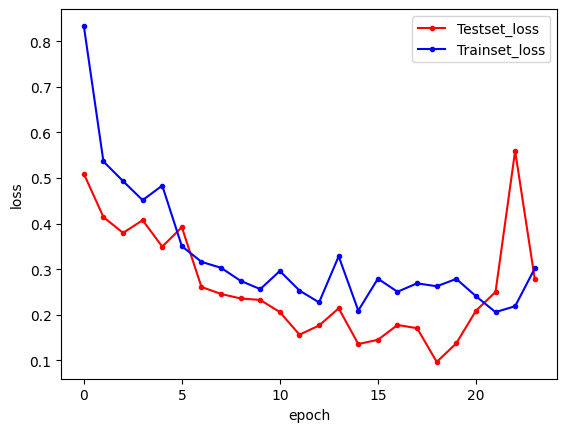

In [10]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.002), metrics=['accuracy'])

earlyStopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    train_genarator,
    epochs=100,
    validation_data=test_generator,
    validation_steps=10,
    callbacks=[earlyStopping_callback])

y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='r', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='b', label='Trainset_loss')

plt.legend()
plt.grid
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()